In [2]:
import os
import librosa
import numpy as np
import tqdm
import matplotlib.pyplot as plt
import pywt

In [3]:
# --- Define base directory and class labels ---
base_dir = "/content/drive/MyDrive/signal_analysis/data"  # or your custom folder
class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']

# --- Function to extract SWT-based statistical features ---
def extract_swt_features(signal, wavelet='db4', level=3):
    coeffs = pywt.swt(signal, wavelet=wavelet, level=level)
    features = []
    for approx, detail in coeffs:
        # Statistics from approximation and detail coefficients
        features.extend([
            np.mean(approx), np.std(approx), np.sum(np.square(approx)),
            np.mean(detail), np.std(detail), np.sum(np.square(detail))
        ])
    return features

# --- Function to process all audio files and return features and labels ---
def process_dataset_swt(base_dir, class_labels, sampling_rate=2000, wavelet='db4', level=3):
    feature_list = []
    label_list = []

    for label in class_labels:
        folder_path = os.path.join(base_dir, label)

        for file_name in tqdm.tqdm(os.listdir(folder_path), desc=f"Processing {label}"):
            if file_name.endswith(".wav"):
                file_path = os.path.join(folder_path, file_name)

                # Load the audio file
                signal, sr = librosa.load(file_path, sr=None)

                # Resample to 2kHz
                signal = librosa.resample(signal, orig_sr=sr, target_sr=sampling_rate)

                # Normalize
                signal = signal / np.max(np.abs(signal))

                # Pad or truncate to fixed length
                desired_length = sampling_rate * 3  # e.g., 3 seconds
                if len(signal) < desired_length:
                    signal = np.pad(signal, (0, desired_length - len(signal)), mode='constant')
                else:
                    signal = signal[:desired_length]

                # Extract SWT features
                features = extract_swt_features(signal, wavelet, level)

                # Save
                feature_list.append(features)
                label_list.append(label)

    # Convert to numpy arrays
    X = np.array(feature_list)
    y = np.array(label_list)

    return X, y


In [4]:
X_swt, y_swt = process_dataset_swt(base_dir, class_labels)
print("Feature shape:", X_swt.shape)
print("Labels shape:", y_swt.shape)


Processing N: 100%|██████████| 200/200 [00:03<00:00, 55.26it/s] 

Feature shape: (1000, 18)
Labels shape: (1000,)


In [5]:
X_swt.shape

(1000, 18)

In [6]:
type(y_swt),type(X_swt)

(numpy.ndarray, numpy.ndarray)

In [7]:
np.unique(y_swt)

array(['AS', 'MR', 'MS', 'MVP', 'N'], dtype='<U3')

In [8]:
y_swt

array(['AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS',
       'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS',
       'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS',
       'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS',
       'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS',
       'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS',
       'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS',
       'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS',
       'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS',
       'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS',
       'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS',
       'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS',
       'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS',
       'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'A

In [9]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Step 1: Get unique class labels and create mapping
unique_classes = np.unique(y_swt)
label_to_index = {label: idx for idx, label in enumerate(unique_classes)}

# Step 2: Encode string labels to integers
y_enc = np.vectorize(label_to_index.get)(y_swt)

# Optional: One-hot encode for use in CNN models
y_onehot = to_categorical(y_enc)

# Print shapes
print("Integer labels:", y_enc[:5])
print("One-hot encoded shape:", y_onehot.shape)


Integer labels: [0 0 0 0 0]
One-hot encoded shape: (1000, 5)


In [10]:
y_enc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [12]:
import pandas as pd

# Convert integer labels to one-hot encoded matrix
y_onehot = pd.get_dummies(y_enc).values

# Check shape
y_onehot.shape


(1000, 5)

In [13]:
y_onehot

array([[ True, False, False, False, False],
       [ True, False, False, False, False],
       [ True, False, False, False, False],
       ...,
       [False, False, False, False,  True],
       [False, False, False, False,  True],
       [False, False, False, False,  True]])

In [15]:
X_swt.shape, y_onehot.shape

((1000, 18), (1000, 5))

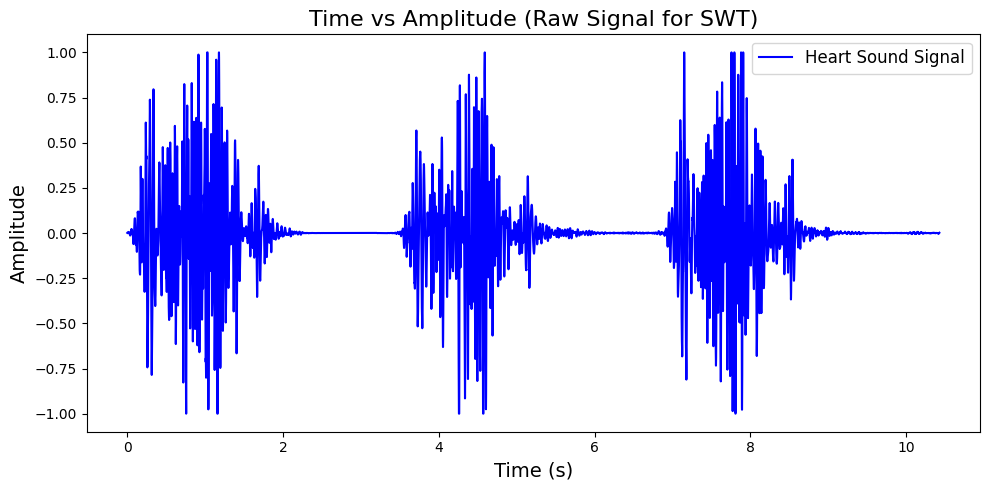

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

# Load the raw heart sound signal
file_path = '/content/drive/MyDrive/signal_analysis/data/AS/New_AS_002.wav'
signal, sample_rate = sf.read(file_path)

# If stereo, convert to mono
if signal.ndim > 1:
    signal = signal[:, 0]

# Create X_raw as a list of signals (assuming you may extend it later)
X_raw = [signal]

# Plotting
sampling_frequency = 2000  # Your SWT preprocessing frequency
n_samples = len(X_raw[0])
duration = n_samples / sampling_frequency
time = np.linspace(0, duration, n_samples)

plt.figure(figsize=(10, 5))
plt.plot(time, X_raw[0], label='Heart Sound Signal', color='blue')
plt.title('Time vs Amplitude (Raw Signal for SWT)', fontsize=16)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



In [23]:
import pywt
import numpy as np

# Function to perform SWT with specified wavelet and level
def apply_swt(signal, wavelet='coif5', level=1):
    """
    Apply Stationary Wavelet Transform to a single signal using the specified wavelet and level.
    Args:
        signal: Input signal array.
        wavelet: Wavelet type to use for SWT.
        level: Decomposition level.
    Returns:
        swt_features: Concatenated approximation and detail coefficients as a 1D feature vector.
    """
    coeffs = pywt.swt(signal, wavelet=wavelet, level=level)
    # Flatten all approximation and detail coefficients
    swt_features = np.hstack([np.hstack((a, d)) for a, d in coeffs])
    return swt_features

# Apply SWT to all signals in X
X_swt = np.array([apply_swt(signal) for signal in X_swt])


In [24]:
X_swt.shape

(1000, 72)

In [25]:
def standardize_data(X):
    """
    Apply standardization (z-score normalization) to all features across the entire dataset.

    Args:
        X: Input feature tensor (n_samples, n_features[, n_channels]).

    Returns:
        X_standardized: Standardized feature tensor with zero mean and unit variance.
    """
    # Calculate mean and std across samples and features
    X_mean = np.mean(X, axis=0, keepdims=True)
    X_std = np.std(X, axis=0, keepdims=True)

    # Avoid division by zero
    X_std = np.where(X_std == 0, 1e-10, X_std)

    # Apply standardization
    X_standardized = (X - X_mean) / X_std
    return X_standardized

# Standardize the SWT features
X_swt_standardized = standardize_data(X_swt)


In [26]:
X_swt_standardized.shape

(1000, 72)

In [27]:
from sklearn.model_selection import train_test_split
import numpy as np

# Perform the train-test split for SWT features
X_train, X_test, y_train, y_test = train_test_split(
    X_swt_standardized, y_enc, test_size=0.2, random_state=42
)

# Check the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (800, 72)
X_test shape: (200, 72)
y_train shape: (800,)
y_test shape: (200,)


In [47]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout



In [48]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1)
X_test_reshape = X_test.reshape(X_test.shape[0], -1)

print("Reshaped train data:", X_train_reshape.shape)
print("Reshaped test data:", X_test_reshape.shape)


Reshaped train data: (800, 72)
Reshaped test data: (200, 72)


In [49]:
print("X_swt shape:", X_swt.shape)


X_swt shape: (1000, 72)


In [51]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the number of classes
num_classes = y_onehot.shape[1]

# Reshape data for CNN
X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshape = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = models.Sequential([
    layers.Input(shape=(X_train_reshape.shape[1], X_train_reshape.shape[2])),  # Dynamic input shape (features, 1)
    layers.Conv1D(32, kernel_size=2, activation='relu'),
    layers.MaxPooling1D(pool_size=2), # Use a reasonable pooling size

    layers.Conv1D(64, kernel_size=2, activation='relu'),
    layers.MaxPooling1D(pool_size=2), # Use a reasonable pooling size

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [43]:
if X_train_reshape.shape[1] == 264512:
    print("Shape is as expected.")
else:
    print(f"Unexpected shape: {X_train_reshape.shape}")


Unexpected shape: (800, 72, 1)


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(4135, 1)),
    MaxPooling1D(pool_size=1),

    Conv1D(64, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=1),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(5, activation='softmax')  # Output layer for 5-class classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 4134, 32)       │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4134, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 4133, 64)       │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 4133, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 264512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    33,857,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,862,565 (129.18 MB)

 Trainable params: 33,862,565 (129.18 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_reshape, y_train,
                    epochs=20, batch_size=32,
                    validation_data=(X_test_reshape, y_test))

cnn_accuracy = model.evaluate(X_test_reshape, y_test, verbose=0)
print(f"CNN Accuracy: {cnn_accuracy[1] * 100:.2f}%")


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.8212 - loss: 0.4933 - val_accuracy: 0.8200 - val_loss: 0.6029
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8452 - loss: 0.4619 - val_accuracy: 0.7950 - val_loss: 0.6561
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8146 - loss: 0.5016 - val_accuracy: 0.7900 - val_loss: 0.6266
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8318 - loss: 0.4938 - val_accuracy: 0.8400 - val_loss: 0.6032
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8490 - loss: 0.4623 - val_accuracy: 0.8350 - val_loss: 0.5581
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8463 - loss: 0.4514 - val_accuracy: 0.8250 - val_loss: 0.5591
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8451 - loss: 0.4365 - val_accuracy: 0.8400 - val_loss: 0.5446
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8495 - loss: 0.4247 - val_accuracy: 0.8550 - val_loss

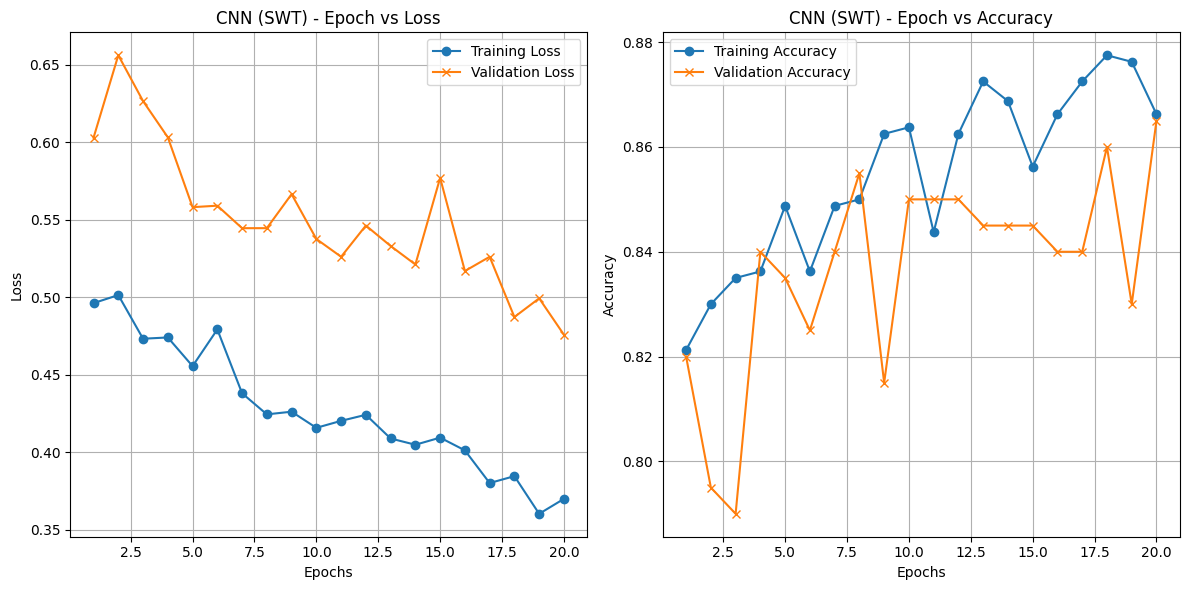

In [57]:
import matplotlib.pyplot as plt

# Extract loss and accuracy from training history
epochs = range(1, len(history.history['loss']) + 1)
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x')
plt.title('CNN (SWT) - Epoch vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='x')
plt.title('CNN (SWT) - Epoch vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [74]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_reshape.shape[1],)),  # e.g., 1088
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [75]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │         9,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,925 (70.02 KB)

 Trainable params: 17,925 (70.02 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history = model.fit(X_train_reshape, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshape, y_test))

# # Evaluate CNN
cnn_accuracy = model.evaluate(X_test_reshape, y_test, verbose=0)
print(f"CNN Accuracy: {cnn_accuracy[1] * 100:.2f}%")

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4900 - loss: 1.2446 - val_accuracy: 0.6250 - val_loss: 1.1569
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6300 - loss: 0.9614 - val_accuracy: 0.6250 - val_loss: 1.0070
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6162 - loss: 0.8865 - val_accuracy: 0.6250 - val_loss: 0.9809
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6624 - loss: 0.8512 - val_accuracy: 0.6500 - val_loss: 0.9455
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6511 - loss: 0.8444 - val_accuracy: 0.6750 - val_loss: 0.9441
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6847 - loss: 0.7878 - val_accuracy: 0.6700 - val_loss: 0.8781
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7144 - loss: 0.7614 - val_accuracy: 0.6950 - val_loss: 0.8610
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6958 - loss: 0.7669 - val_accuracy: 0.7000 - val_lo

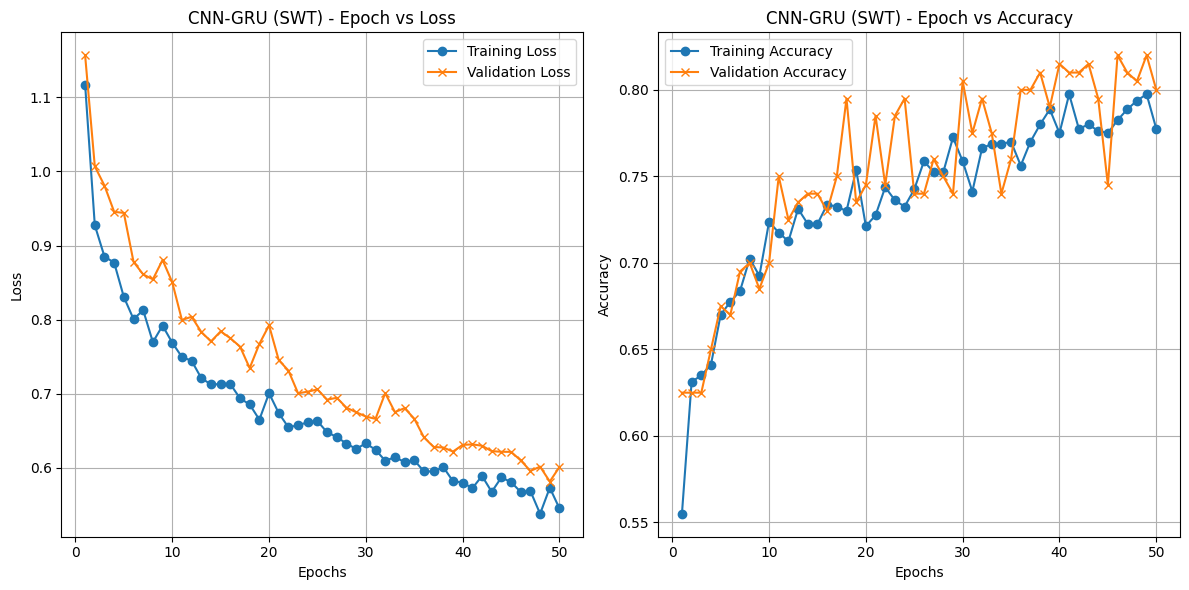

In [77]:
import matplotlib.pyplot as plt

# Extract loss and accuracy
epochs = range(1, len(history.history['loss']) + 1)
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x')
plt.title('CNN-GRU (SWT) - Epoch vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='x')
plt.title('CNN-GRU (SWT) - Epoch vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
